# __Working with Image Data__


## Steps to Be Followed:
1. Importing the necessary libraries
2. Reading and displaying the image
3. Displaying RGB channels
4. Flipping augmentation
5. Performing width shifting augmentation
6. Changing the brightness augmentation

### Step 1: Importing the Necessary Libraries
- Import the required libraries

`pip install scikit-image`

In [5]:
import tensorflow
import keras
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

### Step 2: Reading and Displaying the Image
- Read an image file named **leopard.jpg** using the imread function from the **io** module
- Create a subplot figure with one plot
- Set the width of the figure to **15** inches
- Display the image on the plot using the **imshow** function from the pyplot module

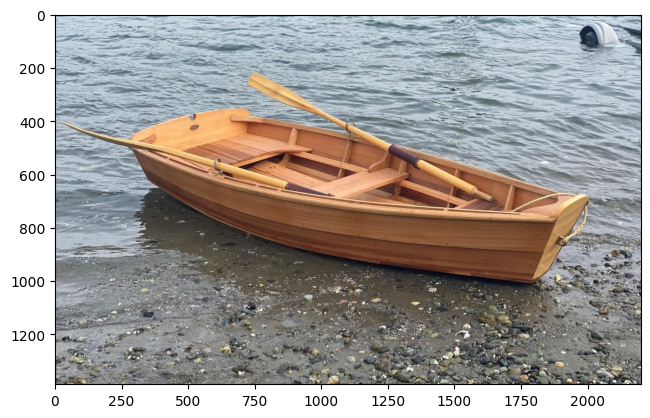

In [20]:
#image = io.imread('leopard.jpg')
image = io.imread('boat.jpeg')
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

__Observation:__
- The output is a plot showing the original image.

### Step 3: Displaying RGB Channels
- Create a plot with one row and four subplots using **subplots(1, 4, sharey=True)**
- Set the width of the figure to 20 using **set_figwidth(20)**
- Display the original image on the first subplot using **im1.imshow(image)**
- Display the red channel of the image on the second subplot using **im2.imshow(image[:, : , 0])**
- Display the green channel of the image on the third subplot using **im3.imshow(image[:, : , 1])**
- Display the blue channel of the image on the fourth subplot using **im4.imshow(image[:, : , 2])**
- Set the title of the figure as **Original and RGB image channels** using **i.suptitle('Original and RGB image channels')**

Text(0.5, 0.98, 'Original and RGB image channels')

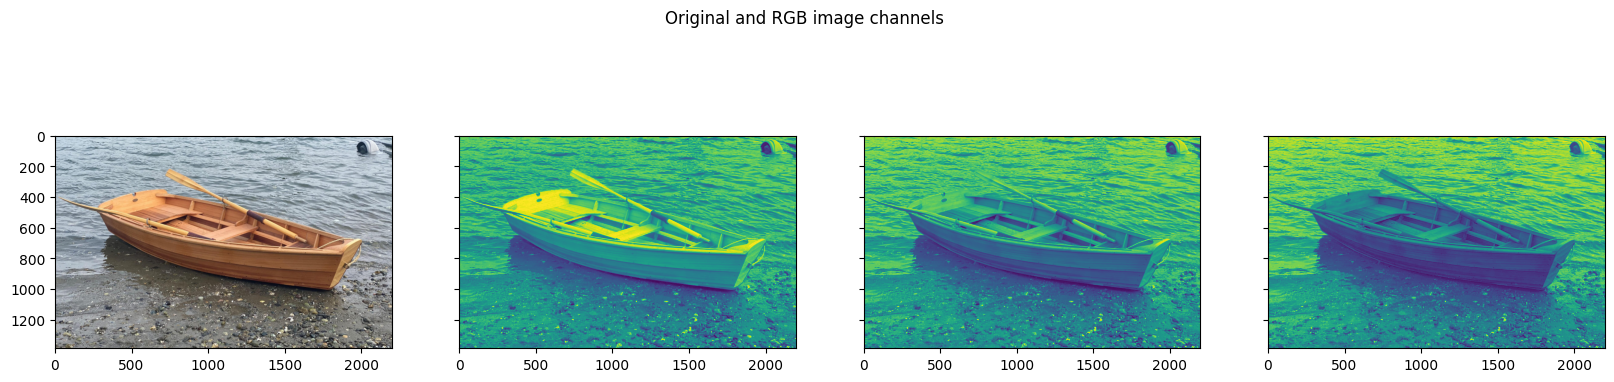

In [21]:

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)
im2.imshow(image[:, : , 0])
im3.imshow(image[:, : , 1])
im4.imshow(image[:, : , 2])
i.suptitle('Original and RGB image channels')

__Observation:__
- The output is a figure with four subplots showing the original image and its RGB channels.

### Step 4: Flipping Augmentation

Applying Horizontal and Vertical Shifting Augmentation to an Image
- The code defines an image augmentation technique called flipping
- The **expand_dims** function is used to add an extra dimension to the image array
- An **ImageDataGenerator** is created with **horizontal_flip=True** and **vertical_flip=True** parameters to enable flipping of the images
- The flow method of the datagen object is called with the samples array and a batch size of **1** to generate a batch of augmented images
- A subplot with **1** row and **3** columns is created with a figure size of **15x15**
- A loop is executed 3 times to generate and plot the augmented images
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the **it** iterator
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the __imshow__ method of the respective subplot

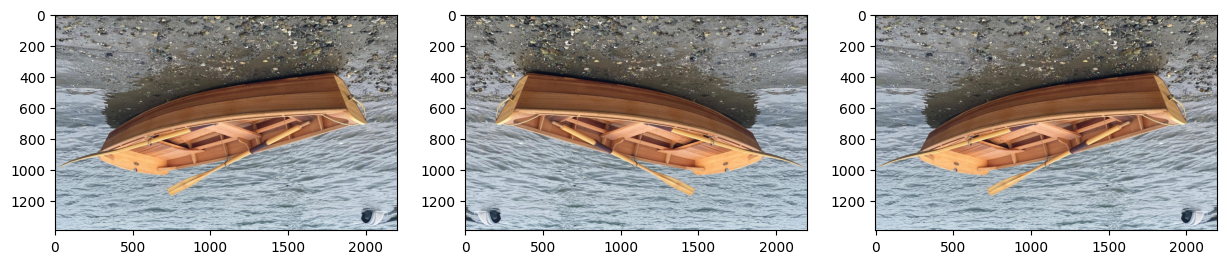

In [22]:
samples = expand_dims(image,0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)


Flipping augmentation is a data augmentation technique commonly used in training convolutional neural networks (CNNs) for computer vision tasks, such as image classification, object detection, and semantic segmentation. The primary purpose of flipping augmentation is to increase the diversity of the training data and improve the model's robustness and generalization ability.

In CNN training, flipping augmentation involves creating new training samples by horizontally and/or vertically flipping the original images. This augmentation technique is particularly useful when the dataset is relatively small or lacks sufficient diversity, as it allows the model to see more variations of the same object or scene during training.

There are two main types of flipping augmentation:

1. Horizontal flipping: This operation mirrors the image horizontally, creating a new image that is a horizontal reflection of the original. Horizontal flipping is useful for objects or scenes that are not intrinsically directional, such as animals, vehicles, or certain types of landscapes.

2. Vertical flipping: This operation mirrors the image vertically, creating a new image that is a vertical reflection of the original. Vertical flipping is less commonly used than horizontal flipping, as many objects or scenes have an inherent vertical orientation (e.g., buildings, text, or objects with a clear up-down direction).

By incorporating flipped images into the training data, the CNN learns to recognize the same object or scene from multiple orientations, improving its ability to generalize to unseen data. This augmentation technique can help mitigate overfitting and enhance the model's robustness to variations in object orientation, which is particularly important in real-world applications where the input data may not always be perfectly aligned.

However, it is important to note that flipping augmentation should be applied judiciously, as not all objects or scenes are invariant to horizontal or vertical flipping. For example, flipping text or human faces may not be appropriate, as the resulting images would be meaningless or misleading. Therefore, the suitability of flipping augmentation depends on the specific domain and the types of objects or scenes in the dataset.

__Observation:__
- The code generates and displays three flipped versions of the original image using horizontal and vertical flipping.

### Step 5: Performing Width Shifting Augmentation
- The code prepares the image for augmentation by adding an extra dimension using **expand_dims**
- An image data augmentation generator is created using **ImageDataGenerator** with a **width_shift_range** of **[-200, 200]**, which specifies the range of horizontal shift values
- An iterator is created using flow on the datagen object with the samples array and a batch size of **1**
- A subplot with **1** row and **3** columns is created with a figure size of **15x15**
- A loop is executed 3 times to generate and plot augmented images.
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the it iterator
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the __imshow__ method of the respective subplot

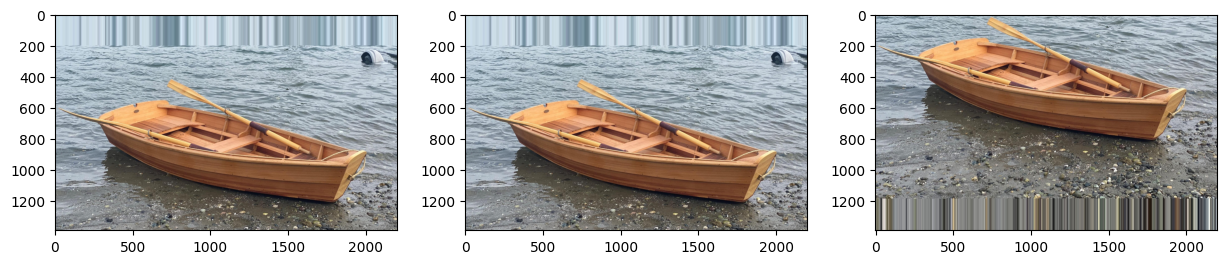

In [23]:
samples = expand_dims(image, 0)

datagen = ImageDataGenerator(width_shift_range=[-200,200])

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

__Observation:__
- The code generates and displays three horizontally shifted versions of the original image within the specified range **[-200, 200]**.

Width shifting augmentation is another data augmentation technique used in training convolutional neural networks (CNNs) for computer vision tasks. It involves shifting the image horizontally, either to the left or right, by a certain number of pixels.

The purpose of width shifting augmentation is to introduce translational invariance to the CNN model, which means that the model should be able to recognize objects or patterns regardless of their horizontal position within the image. This is particularly useful in scenarios where the object of interest may appear at different positions across images, such as in object detection or semantic segmentation tasks.

Here's how width shifting augmentation works:

1. The original image is padded with a border of pixels (usually black or the mean pixel value of the dataset) on the left and right sides. The width of the border determines the maximum shift range.

2. The image is then shifted horizontally, either to the left or right, by a random number of pixels within the specified shift range.

3. The shifted image, along with the original image, is included in the training dataset.

By exposing the CNN to shifted versions of the same image during training, the model learns to recognize objects or patterns regardless of their horizontal position within the image. This augmentation technique can improve the model's robustness and generalization ability, particularly in scenarios where the object of interest may appear at different locations across images.

It's important to note that width shifting augmentation should be applied with care, as excessive shifting may result in the object of interest being partially or completely cropped out of the image. Therefore, the shift range should be chosen carefully based on the characteristics of the dataset and the problem at hand.

Additionally, width shifting augmentation can be combined with other augmentation techniques, such as height shifting (vertical shift), rotation, scaling, or flipping, to introduce even more variability and robustness to the CNN model.

### Step 6: Changing the Brightness Augmentation
- An image data augmentation generator is created using **ImageDataGenerator** with a **brightness_range** of **[0.5, 2.0]**, which specifies the range of brightness values
- An iterator is created using flow on the datagen object with the samples array and a batch size of **1**
- A subplot with **1** row and **3** columns is created with a figure size of **15x15**
- A loop is executed 3 times to generate and plot augmented images
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the it iterator
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the imshow method of the respective subplot

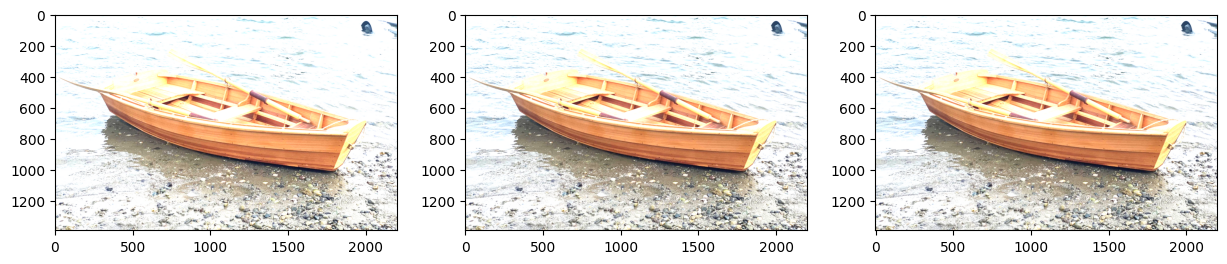

In [24]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

__Observation:__
- The code generates and displays three brightness-augmented versions of the original image within the specified brightness range __[0.5, 2.0]__.